K- Nearest Neighbour

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
# Load datasets
data = pd.read_csv("salary.csv")
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [3]:
# Summarize Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [4]:
# Mapping salary data to binary data
income_set = set(data['income'])
data['income']= data['income'].map({'<=50K':0,'>50K':1}).astype(int)
print(data.head())

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


In [5]:
# segregate the dataset into Independent Variables and dependent Variables
X= data.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [6]:
Y = data.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
# Splitting Dataset into  Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=0)

In [8]:
# Transform the datset
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Mean Error')

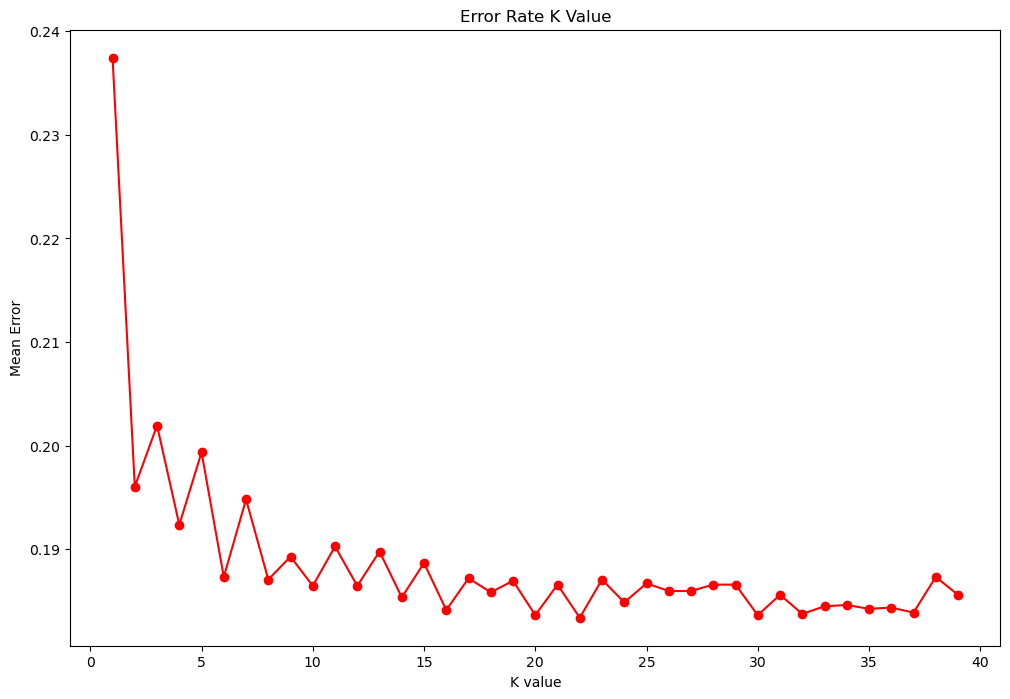

In [9]:
# finding The Best K-value
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 10 to 40
error= []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    error.append(np.mean(y_pred != y_test))

plt.figure(figsize=(12,8))
plt.plot(range(1,40),error,color='red',marker='o')
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=22,metric='minkowski',p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [11]:
y_pred = model.predict(X_test)

In [12]:
# Evaluating Model - Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

print(accuracy_score(y_test,y_pred)*100)

Confusion Matrix: 
[[5889  304]
 [1189  759]]
81.66072964009335
